In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import matplotlib as mp
import seaborn as sns
from scipy.stats import zscore
from mpl_toolkits.mplot3d import Axes3D


In [57]:
FD = pd.read_csv(r"C:\Users\pc\Desktop\KAIM10X\Fraud_Data.csv")
FD.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


# Get an overview of the dataset

In [56]:
print(FD.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB
None


##  Here is a breakdown dataset
- **RangeIndex** : 151112 entries, 0 to 151111: This line indicates that the DataFrame has a total of 151112 rows, with row indices ranging from 0 to 151111.

- **Data columns** Data columns (total 11 columns): This signifies that the DataFrame consists of 11 columns.
Column details:

- **user_id** : It contains 151112 non-null integer values.

- **signup_time** : It contains 151112 non-null datetime values represented as objects.

- **purchase_time** : It contains 151112 non-null datetime values represented as objects.

- **purchase_value**: It contains 151112 non-null integer values.

- **device_id** : It contains 151112 non-null values represented as objects.

- **source** : It contains 151112 non-null values represented as objects.

- **browser** : It contains 151112 non-null values represented as objects.

- **sex** : It contains 151112 non-null values represented as objects.
- **age** : It contains 151112 non-null integer values.

- **ip_address** : It contains 151112 non-null float values.

- **class** : It contains 151112 non-null integer values.


In [55]:
print(FD['purchase_value'].describe())

count    151112.000000
mean         36.935372
std          18.322762
min           9.000000
25%          22.000000
50%          35.000000
75%          49.000000
max         154.000000
Name: purchase_value, dtype: float64


###  the "purchase_value" column:

- **count**: This represents the total number of non-null values in the "purchase_value" column, which is 151112.

- **mean**: The mean (average) purchase value in the "purchase_value" column is approximately 36.94.

- **std**: The standard deviation of the values in the "purchase_value" column is around 18.32. This indicates the variability or dispersion of values around the mean.

- **min**: The minimum purchase value in the column is 9. This is the smallest value present in the dataset.

- **first quartile**25%: This is the first quartile (Q1) value, which means that 25% of the values in the "purchase_value" column are below 22.

- **second quartile**50%: This is the second quartile or median value. It indicates that 50% of the values in the "purchase_value" column are below 35.

- **third quartile**75%: This is the third quartile (Q3) value, showing that 75% of the values in the "purchase_value" column are below 49.

- **max**: The maximum purchase value in the column is 154. This is the largest value present in the dataset.

- **purchase_value** Name: purchase_value, dtype: float64: This part indicates that this summary is for the "purchase_value" column, which contains floating-point (float) values.

In [54]:
print(FD['age'].describe())

count    151112.000000
mean         33.140704
std           8.617733
min          18.000000
25%          27.000000
50%          33.000000
75%          39.000000
max          76.000000
Name: age, dtype: float64


In [53]:
print(FD['sex'].describe())

count     151112
unique         2
top            M
freq       88293
Name: sex, dtype: object


## Here is sex data summary :

- **count**: This represents the total number of non-null values in the "sex" column, which is 151112.

- **unique**: It indicates the number of unique values present in the "sex" column. In this case, there are 2 unique values ('M' and 'F').

 - **top**: This shows the most frequently occurring value in the "sex" column, which is 'M'.

- **freq** : It displays the frequency of the top value 'M' in the "sex" column, which is 88293. This means 'M' appears 88293 - times in the column.

- **sex** Name: sex, dtype: object: This indicates the name of the column being described ('sex') and the data type of the values in that column (object, which usually represents strings in Pandas).

In [52]:
print(FD['signup_time'].describe())

count                  151112
unique                 151112
top       2015-02-24 22:55:49
freq                        1
Name: signup_time, dtype: object


Here is an explanation :

- **count**: There are 151112 non-null values in the column.
- **unique**: There are 151112 unique values in the column.
- **top**: The most common value in the column is '2015-02-24 22:55:49'.
- **freq**: The value '2015-02-24 22:55:49' appears 1 time in the column, making it the most frequent value.


In [51]:
print(FD['purchase_time'].describe())

count                  151112
unique                 150679
top       2015-06-08 09:42:04
freq                        3
Name: purchase_time, dtype: object


Here is an explanation for  "purchase_time" :

- **count**: This represents the total number of non-null values in the "purchase_time" column, which is 151112.

- **unique**: It indicates the number of unique values present in the "purchase_time" column, which is 150679. This means that there are repeated timestamps in the column.

- **top**: This shows the most frequently occurring value in the "purchase_time" column, which is '2015-06-08 09:42:04'.

- **freq**: It displays the frequency of the top value '2015-06-08 09:42:04' in the "purchase_time" column, which is 3. This means that '2015-06-08 09:42:04' appears three times in the column, making it the most common timestamp.

- **Name: purchase_time, dtype: object**: This part indicates that this summary is for the "purchase_time" column, which contains object data type values, typically representing string or datetime values.



In [59]:
print(FD['source'].describe())

count     151112
unique         3
top          SEO
freq       60615
Name: source, dtype: object


Here is an explanation for  "source" column:

- **count**: This indicates the total number of non-null values in the "source" column, which is 151112.

- **unique**: It represents the number of unique values present in the "source" column, which is 3. This suggests that there are only 3 unique sources in the dataset.

- **top**: The "top" value signifies the most frequently occurring value in the "source" column, which is 'SEO'.

- **freq**: This shows the frequency of the top value 'SEO' in the "source" column, which is 60615. This means that 'SEO' appears 60615 times in the column, making it the most common source.



# Check for missing values

In [60]:

print(FD.isnull().sum())

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


####  Here is an explanation :

- **user_id**: There are 0 missing values in the "user_id" column.

- **signup_time**: There are 0 missing values in the "signup_time" column.

- **purchase_time**: There are 0 missing values in the "purchase_time" column.

- **purchase_value**: There are 0 missing values in the "purchase_value" column.

- **device_id**: There are 0 missing values in the "device_id" column.

- **source**: There are 0 missing values in the "source" column.

- **browser**: There are 0 missing values in the "browser" column.

- **sex**: There are 0 missing values in the "sex" column.

- **age**: There are 0 missing values in the "age" column.

- **ip_address**: There are 0 missing values in the "ip_address" column.

- **class**: There are 0 missing values in the "class" column.



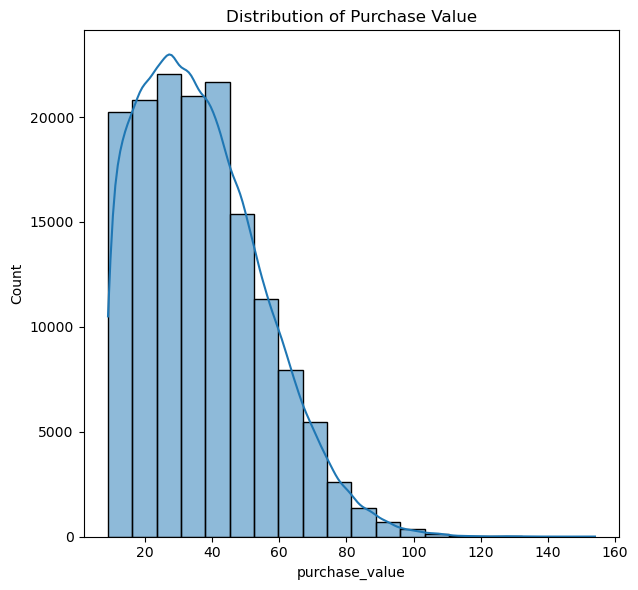

In [61]:
if 'FD' in locals():
    # Histograms for 'purchase_value' and 'age'
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data=FD, x='purchase_value', bins=20, kde=True)
    plt.title('Distribution of Purchase Value')

    plt.tight_layout()
    plt.show()
    

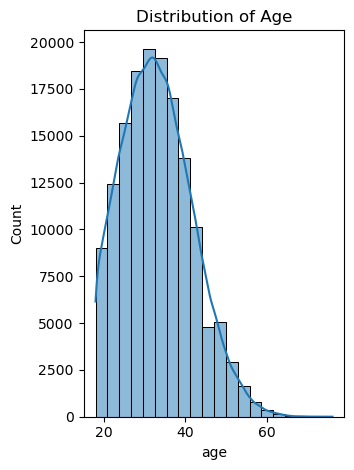

In [62]:
plt.subplot(1, 2, 2)
sns.histplot(data=FD, x='age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.tight_layout()
plt.show()

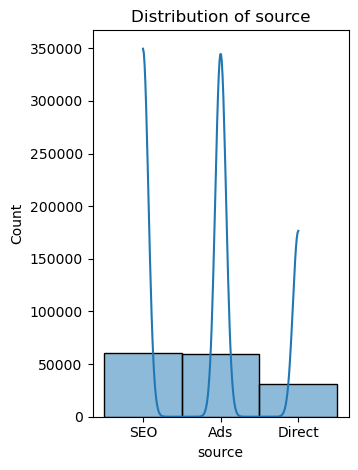

In [63]:
plt.subplot(1, 2, 2)
sns.histplot(data=FD, x='source', bins=20, kde=True)
plt.title('Distribution of source')
plt.tight_layout()
plt.show()

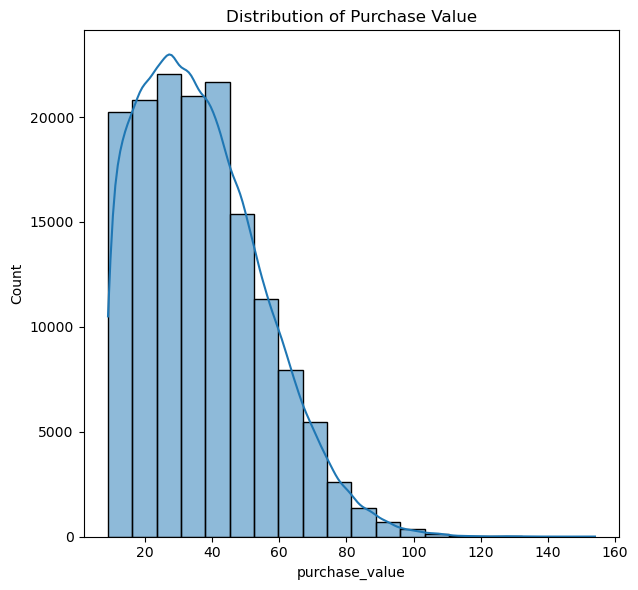

In [64]:
if 'FD' in locals():
    # Histograms for 'purchase_value' and 'age'
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data=FD, x='purchase_value', bins=20, kde=True)
    plt.title('Distribution of Purchase Value')

    plt.tight_layout()
    plt.show()

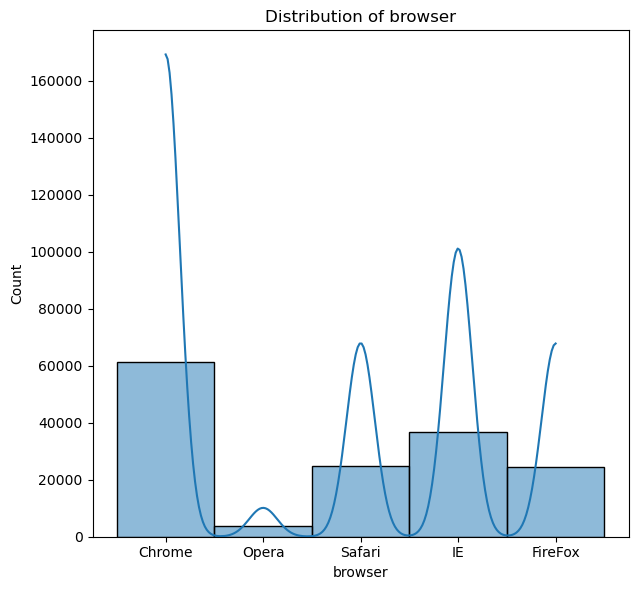

In [65]:
if 'FD' in locals():
    # Histograms for 'purchase_value' and 'age'
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data=FD, x='browser', bins=20, kde=True)
    plt.title('Distribution of browser')

    plt.tight_layout()
    plt.show()

  # Scatter plot for 'purchase_value' and 'age'

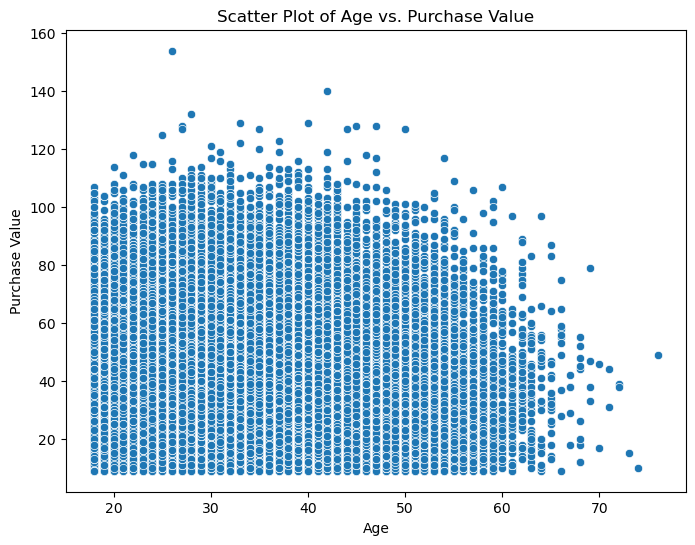

In [66]:
  
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=FD, x='age', y='purchase_value')
    plt.title('Scatter Plot of Age vs. Purchase Value')
    plt.xlabel('Age')
    plt.ylabel('Purchase Value')
    plt.show()

  # Scatter plot for 'source' and 'age'

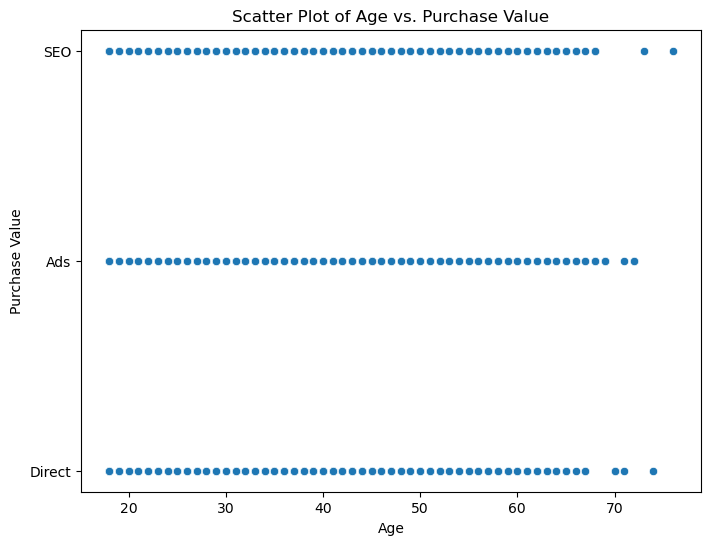

In [67]:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=FD, x='age', y='source')
    plt.title('Scatter Plot of Age vs. Purchase Value')
    plt.xlabel('Age')
    plt.ylabel('Purchase Value')
    plt.show()

# Create a scatter plot to visualize the correlation between 'purchase_value' and 'age'

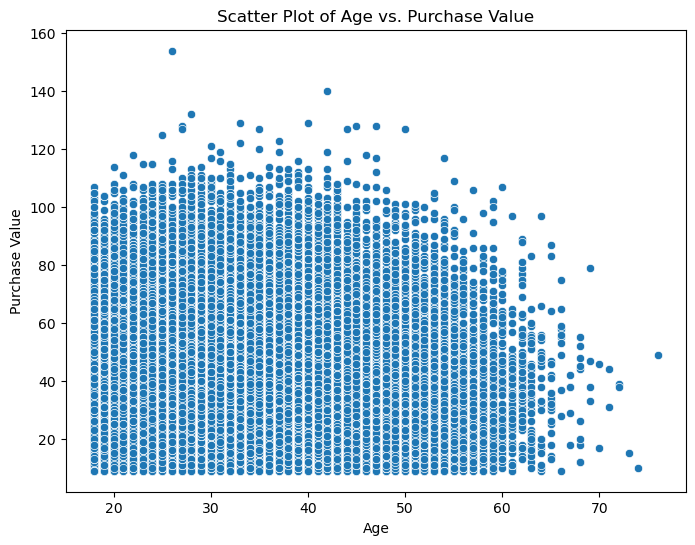

In [68]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=FD, x='age', y='purchase_value')
plt.title('Scatter Plot of Age vs. Purchase Value')
plt.xlabel('Age')
plt.ylabel('Purchase Value')
plt.show()

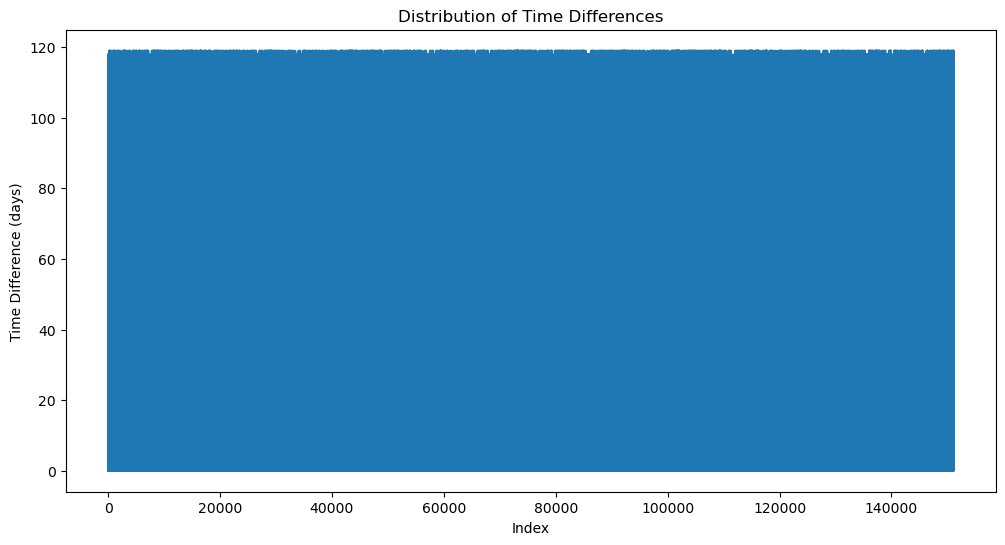

In [70]:
# Assuming 'signup_time' and 'purchase_time' columns are of type datetime
# Convert them to datetime objects for further analysis
FD['signup_time'] = pd.to_datetime(FD['signup_time'])
FD['purchase_time'] = pd.to_datetime(FD['purchase_time'])

# Calculate the time differences between signup and purchase events
FD['time_difference'] = FD['purchase_time'] - FD['signup_time']

# Analyze the time differences to identify any patterns or seasonality
# For example, you can plot the frequency of time differences to see if there are any recurring patterns
time_differences = FD['time_difference'].dt.days
plt.figure(figsize=(12, 6))
sns.lineplot(data=FD, x=range(len(FD)), y=time_differences)
plt.title('Distribution of Time Differences')
plt.xlabel('Index')
plt.ylabel('Time Difference (days)')
plt.show()

# Anomaly Detection:

In [71]:
# Calculate Z-scores for the "purchase_value" column
FD['purchase_value_zscore'] = (FD['purchase_value'] - FD['purchase_value'].mean()) / FD['purchase_value'].std()

# Identify outliers based on Z-scores
purchase_value_outliers = FD[(FD['purchase_value_zscore'] > 3) | (FD['purchase_value_zscore'] < -3)]

# Display the identified outliers for "purchase_value" and "age"
print("Outliers in 'purchase_value':")
print(purchase_value_outliers)



Outliers in 'purchase_value':
        user_id         signup_time       purchase_time  purchase_value  \
351       50437 2015-07-12 09:29:46 2015-10-04 13:26:32             107   
661      223039 2015-03-24 14:22:22 2015-07-09 07:58:22              92   
974      370848 2015-07-28 13:26:21 2015-11-17 08:51:28             101   
986      306759 2015-03-03 10:18:08 2015-04-03 16:39:47              96   
1064     139908 2015-05-20 12:44:19 2015-08-13 12:45:59              92   
...         ...                 ...                 ...             ...   
149345    43264 2015-07-01 00:11:41 2015-09-17 21:48:29             106   
150341   113955 2015-07-21 22:55:06 2015-08-28 03:05:22             108   
150354   325919 2015-07-30 08:29:35 2015-07-31 23:04:46             101   
150535   365551 2015-03-07 23:05:02 2015-04-28 01:35:41              93   
151066   219307 2015-01-02 02:52:49 2015-04-03 05:52:01              93   

            device_id  source  browser sex  age    ip_address  class 

# Anomaly Detection:

In [73]:
# Calculate Z-scores for the "age" column
FD['age_zscore'] = (FD['age'] - FD['age'].mean()) / FD['age'].std()

# Identify outliers based on Z-scores for the "age" column
age_outliers = FD[(FD['age_zscore'] > 3) | (FD['age_zscore'] < -3)]

print("\nOutliers in 'age':")
print(age_outliers)



Outliers in 'age':
        user_id         signup_time       purchase_time  purchase_value  \
103      257432 2015-03-24 09:08:01 2015-04-06 02:30:40              41   
444        5677 2015-01-01 17:10:13 2015-01-01 17:10:14              22   
521        3605 2015-01-29 15:36:24 2015-03-07 16:25:38              35   
871      273721 2015-05-01 01:24:40 2015-07-28 13:50:40              38   
934       36120 2015-05-13 10:12:00 2015-07-07 10:16:29              25   
...         ...                 ...                 ...             ...   
149309    58542 2015-05-31 04:27:53 2015-08-26 03:06:03              30   
149766   210584 2015-06-26 11:46:50 2015-09-26 04:31:36              38   
150396    78362 2015-08-14 22:54:28 2015-08-30 19:28:07              16   
150890    94503 2015-04-14 03:44:23 2015-05-10 07:56:30              27   
150955    54302 2015-08-17 00:02:39 2015-12-14 14:23:24              23   

            device_id  source  browser sex  age    ip_address  class  \
103    

In [74]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define features and target variable

In [75]:

X = FD.drop('class', axis=1)
y = FD['class']



# Split the data into training and testing sets

In [76]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier

In [77]:

rf_model = RandomForestClassifier()


# Fit the model on the training data

# Convert date-time columns to datetime format

In [78]:

FD['signup_time'] = pd.to_datetime(FD['signup_time'])
FD['purchase_time'] = pd.to_datetime(FD['purchase_time'])

# Extract features from date-time columns

In [79]:

FD['signup_hour'] = FD['signup_time'].dt.hour
FD['signup_dayofweek'] = FD['signup_time'].dt.dayofweek


# Extract features from date-time for purchase_time

In [80]:
FD['purchase_hour'] = FD['purchase_time'].dt.hour
FD['purchase_dayofweek'] = FD['purchase_time'].dt.dayofweek

# Drop the original date-time columns


In [81]:
FD.drop(['signup_time', 'purchase_time'], axis=1, inplace=True)

In [82]:
print(FD.dtypes)

user_id                            int64
purchase_value                     int64
device_id                         object
source                            object
browser                           object
sex                               object
age                                int64
ip_address                       float64
class                              int64
time_difference          timedelta64[ns]
purchase_value_zscore            float64
age_zscore                       float64
signup_hour                        int32
signup_dayofweek                   int32
purchase_hour                      int32
purchase_dayofweek                 int32
dtype: object


# Convert a specific column to numeric format

In [83]:
# Convert a specific column to numeric format
FD['sex'] = pd.to_numeric(FD['sex'], errors='coerce')

In [84]:
FD['browser'] = pd.to_numeric(FD['browser'], errors='coerce')

In [85]:
FD['device_id'] = pd.to_numeric(FD['device_id'], errors='coerce')

In [86]:
FD['source'] = pd.to_numeric(FD['source'], errors='coerce')

In [87]:
FD['purchase_dayofweek'] = pd.to_numeric(FD['purchase_dayofweek'], errors='coerce')
 

In [88]:
FD['purchase_hour'] = pd.to_numeric(FD['purchase_hour'], errors='coerce')
             


In [89]:
FD['signup_dayofweek'] = pd.to_numeric(FD['signup_dayofweek'], errors='coerce')
        

In [90]:
FD['signup_hour'] = pd.to_numeric(FD['signup_hour'], errors='coerce')
             

In [91]:
FD['class'] = pd.to_numeric(FD['class'], errors='coerce')

In [92]:
FD['age'] = pd.to_numeric(FD['age'], errors='coerce')

In [93]:
FD['purchase_value'] = pd.to_numeric(FD['purchase_value'], errors='coerce')

In [94]:
FD['user_id'] = pd.to_numeric(FD['user_id'], errors='coerce')

In [95]:
print(FD.dtypes)

user_id                            int64
purchase_value                     int64
device_id                        float64
source                           float64
browser                          float64
sex                              float64
age                                int64
ip_address                       float64
class                              int64
time_difference          timedelta64[ns]
purchase_value_zscore            float64
age_zscore                       float64
signup_hour                        int32
signup_dayofweek                   int32
purchase_hour                      int32
purchase_dayofweek                 int32
dtype: object


In [98]:
y_train = np.array(y_train)


In [99]:
rf_model.fit(X_train, y_train)

TypeError: float() argument must be a string or a real number, not 'Timestamp'

# Make predictions

In [ ]:

y_pred = rf_model.predict(X_test)



# Evaluate the model

In [ ]:

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.9558945174205076

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     27373
           1       0.99      0.54      0.70      2850

    accuracy                           0.96     30223
   macro avg       0.97      0.77      0.84     30223
weighted avg       0.96      0.96      0.95     30223


Confusion Matrix:
 [[27363    10]
 [ 1323  1527]]


In [100]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [101]:
FD.head()

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,time_difference,purchase_value_zscore,age_zscore,signup_hour,signup_dayofweek,purchase_hour,purchase_dayofweek
0,22058,34,NaN,NaN,NaN,NaN,39,7.327584e+08,0,52 days 03:51:22,-0.160204,0.679912,22,1,2,5
1,333320,16,NaN,NaN,NaN,NaN,53,3.503114e+08,0,0 days 04:59:04,-1.142588,2.304469,20,6,1,0
2,1359,15,NaN,NaN,NaN,NaN,53,2.621474e+09,1,0 days 00:00:01,-1.197165,2.304469,18,3,18,3
3,150084,44,NaN,NaN,NaN,NaN,41,3.840542e+09,0,5 days 16:41:25,0.385566,0.911991,21,1,13,0
4,221365,39,NaN,NaN,NaN,NaN,45,4.155831e+08,0,50 days 11:31:01,0.112681,1.376150,7,1,18,2


# Define features (X) and target variable (y)

In [102]:


X = FD.drop('purchase_value', axis=1)  # Features
y = FD['age']  # Target variable


# Split the data into training and testing sets

In [103]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Initialize and fit the Logistic Regression model

In [105]:
# Convert all columns to numeric data types
df = FD.apply(pd.to_numeric, errors='coerce')

In [107]:
# Convert a specific column to numeric format
FD['sex'] = pd.to_numeric(FD['sex'], errors='coerce')
FD['browser'] = pd.to_numeric(FD['browser'], errors='coerce')
FD['device_id'] = pd.to_numeric(FD['device_id'], errors='coerce')
FD['source'] = pd.to_numeric(FD['source'], errors='coerce')
FD['purchase_dayofweek'] = pd.to_numeric(FD['purchase_dayofweek'], errors='coerce')
 
FD['purchase_hour'] = pd.to_numeric(FD['purchase_hour'], errors='coerce')
             

FD['signup_dayofweek'] = pd.to_numeric(FD['signup_dayofweek'], errors='coerce')
        
FD['signup_hour'] = pd.to_numeric(FD['signup_hour'], errors='coerce')
             
FD['class'] = pd.to_numeric(FD['class'], errors='coerce')
FD['age'] = pd.to_numeric(FD['age'], errors='coerce')
FD['purchase_value'] = pd.to_numeric(FD['purchase_value'], errors='coerce')
FD['user_id'] = pd.to_numeric(FD['user_id'], errors='coerce')
print(FD.dtypes)

user_id                            int64
purchase_value                     int64
device_id                        float64
source                           float64
browser                          float64
sex                              float64
age                                int64
ip_address                       float64
class                              int64
time_difference          timedelta64[ns]
purchase_value_zscore            float64
age_zscore                       float64
signup_hour                        int32
signup_dayofweek                   int32
purchase_hour                      int32
purchase_dayofweek                 int32
dtype: object


In [109]:
X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
y_train = y_train.apply(pd.to_numeric, errors='coerce').fillna(0)

In [129]:

model = LogisticRegression()
model.fit(X_train, y_train)



c:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [112]:
# Convert a specific column to numeric format
FD['sex'] = pd.to_numeric(FD['sex'], errors='coerce')
FD['browser'] = pd.to_numeric(FD['browser'], errors='coerce')
FD['device_id'] = pd.to_numeric(FD['device_id'], errors='coerce')
FD['source'] = pd.to_numeric(FD['source'], errors='coerce')
FD['purchase_dayofweek'] = pd.to_numeric(FD['purchase_dayofweek'], errors='coerce')
 
FD['purchase_hour'] = pd.to_numeric(FD['purchase_hour'], errors='coerce')
             

FD['signup_dayofweek'] = pd.to_numeric(FD['signup_dayofweek'], errors='coerce')
        
FD['signup_hour'] = pd.to_numeric(FD['signup_hour'], errors='coerce')
             
FD['class'] = pd.to_numeric(FD['class'], errors='coerce')
FD['age'] = pd.to_numeric(FD['age'], errors='coerce')
FD['purchase_value'] = pd.to_numeric(FD['purchase_value'], errors='coerce')
FD['user_id'] = pd.to_numeric(FD['user_id'], errors='coerce')
print(FD.dtypes)

user_id                            int64
purchase_value                     int64
device_id                        float64
source                           float64
browser                          float64
sex                              float64
age                                int64
ip_address                       float64
class                              int64
time_difference          timedelta64[ns]
purchase_value_zscore            float64
age_zscore                       float64
signup_hour                        int32
signup_dayofweek                   int32
purchase_hour                      int32
purchase_dayofweek                 int32
dtype: object


In [127]:
# Drop the temporary timestamp column if needed
FD.drop('purchase_hour', axis=1, inplace=True)

In [130]:
X = FD[['purchase_value', 'age']]  # Example features
y = FD['class']  # Assuming 'class' column contains the target variable

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [128]:
# Make predictions
y_pred = model.predict(X_test)



DTypePromotionError: The DType <class 'numpy.dtypes.TimeDelta64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.TimeDelta64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>)

In [114]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)



NameError: name 'y_pred' is not defined

In [ ]:
# Print the evaluation metrics
print("Accuracy Score:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

In [ ]:
IP = pd.read_csv(r"C:\Users\pc\Desktop\KAIM10X\IpAddress_to_Country.csv")
IP.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [ ]:
print(IP.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None


In [ ]:
print(IP.isnull().sum())

lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64


In [ ]:
print(IP['country'].describe())

count            138846
unique              235
top       United States
freq              46868
Name: country, dtype: object


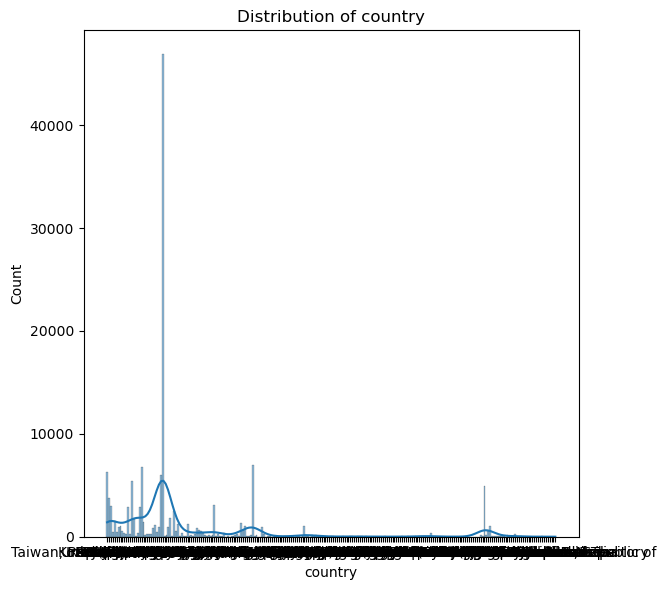

In [ ]:
if 'IP' in locals():
    # Histograms for 'country' and 'upper_bound_ip_address'
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data=IP, x='country', bins=20, kde=True)
    plt.title('Distribution of country')

    plt.tight_layout()
    plt.show()


In [ ]:
cc= pd.read_csv(r"C:\Users\pc\Desktop\KAIM10X\creditcard.csv")
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
